In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Problem 1. 

## Simulate simple random walk from Theory 1 and find empirical probabilities of A and B.
## Problem 1 Theory: For the simple random walk starting from 3, with probabilities 0.6 and 0.4 going up or down, find the probability:

### A. It will hit 10 before -1. 

In [2]:
N = 1000
p=0.6
q=0.4
#Sn = np.empty((N, 0)).tolist()
Sn =[]
Z= [3] #S_0 - start position
np.random.seed(1)
for i in range(N):
    A = [3]
    while (A[-1] != 10) and (A[-1] != -1):
        A.append(A[-1] + np.random.choice(a=[-1,1],p=[q,p]))
    
    Sn.append(A)

In [3]:
count = 0
for i in range(N):
    if Sn[i][-1] == 10:
        count+=1

In [4]:
print('Empirical probability of hitting 10 before -1:', count/N)

Empirical probability of hitting 10 before -1: 0.812


### B. it reaches 5 in 10 steps, and always stays strictly above zero. 

In [5]:
T = 10
N = 10000
p=0.6
q=0.4
Sn =[]
np.random.seed(1)
for i in range(N):
    Z = np.random.choice(a=[-1,1],p=[q,p], size=T+1)
    Z[0]= 3 #S_0 - start position
    Sn.append(np.cumsum(Z))

In [6]:
count = 0
for i in range(N):
    if (Sn[i][-1] == 5) and (np.min(Sn[i])>0):
        count+=1

In [7]:
print('Probability of path ending at 5 and staying strictly above 0:',count/N)

Probability of path ending at 5 and staying strictly above 0: 0.2377


# Problem 2. 


## Simulate 2000 steps of AR(1) from Theory 2 and find the empirical stationary distribution (plot the histogram and find the empirical mean and variance) after a burn-in period of 100 steps. Plot the autocorrelation function. 

In [8]:
N = 2000
n = 100
X_n = [2]
a = 0.9
c = 2 
b = 2.5
np.random.seed(1)
Z_n = np.random.normal(0,1,N)
f = lambda X, Z: 0.9*X + c + 2.5*Z

In [9]:
for i in range(N):
    X_n.append(f(X_n[i], Z_n[i]))

In [10]:
print('Mean of Xn after 100 step burn-in period:', np.mean(X_n[100:]))
print('Variance of Xn after 100 step burn-in period:',np.var(X_n[100:], ddof=1))


Mean of Xn after 100 step burn-in period: 20.800046374254684
Variance of Xn after 100 step burn-in period: 30.40941231437156


<AxesSubplot:title={'center':'Distribution of Xn'}, ylabel='Probability'>

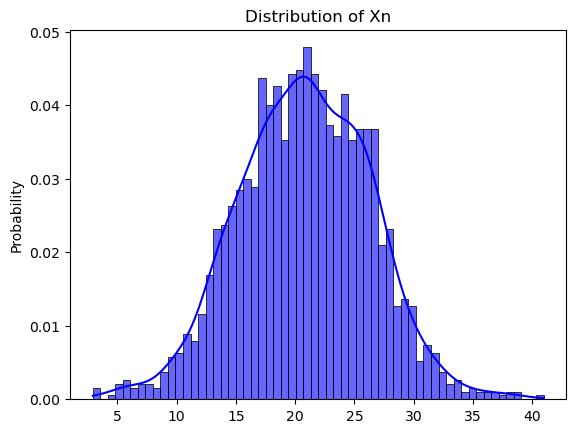

In [11]:
# plotting histogram of AR(1) after burn-in period
plt.title('Distribution of Xn')
sns.histplot(X_n[100:], color='blue', alpha=0.6, bins=60, stat='probability', kde=True)

(0.0, 50.0)

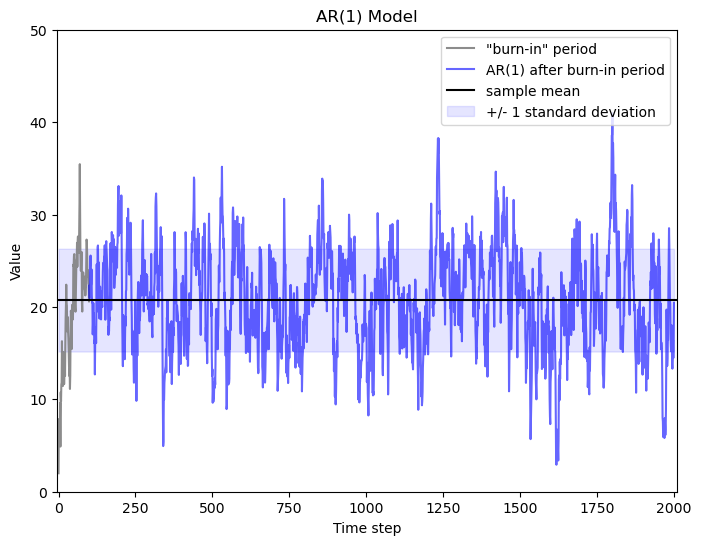

In [12]:
# plotting the AR model
fig = plt.subplots(figsize=(8,6))
t = np.arange(N+1)
plt.plot(t[:100], X_n[:100], color='grey', alpha=0.9, label='"burn-in" period')
plt.plot(t[100:], X_n[100:], color='blue', label='AR(1) after burn-in period', alpha=0.6)
plt.axhline(np.mean(X_n), color='k', label='sample mean')
plt.fill_between(x=t, y1=np.mean(X_n)- np.std(X_n), y2= np.mean(X_n)+ np.std(X_n), alpha=0.1, color='blue', label='+/- 1 standard deviation')
plt.ylabel('Value')
plt.xlabel('Time step')
plt.title('AR(1) Model')
plt.legend(loc='upper right')
plt.xlim(-5,2010)
plt.ylim(0,50)

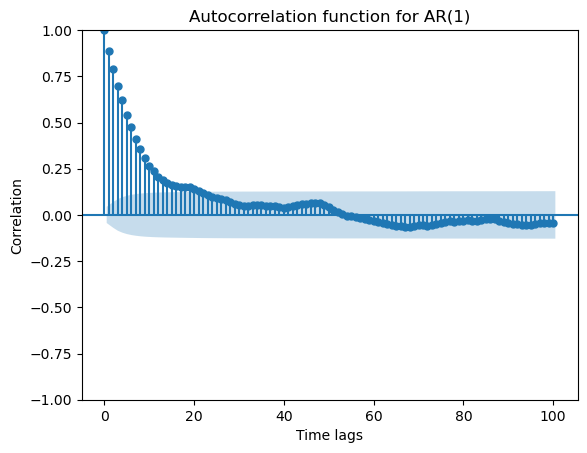

In [13]:
sm.graphics.tsa.plot_acf(X_n, lags=100)
plt.ylabel('Correlation')
plt.xlabel('Time lags')
plt.title('Autocorrelation function for AR(1)')
plt.show()